In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from faceparsing.parser import FaceParser
from imagine.shape.segment import FaceParsingSegmenter

In [2]:
img_path = "face.jpg"

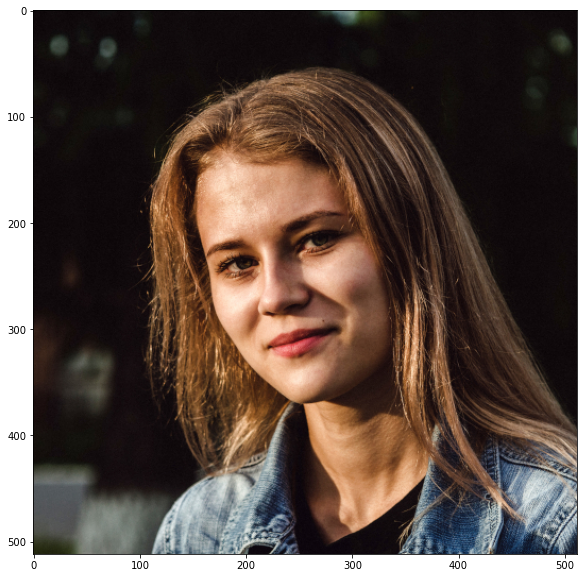

In [3]:
image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)

In [4]:
parser = FaceParser()
segmenter = FaceParsingSegmenter(parser)

In [5]:
parts_map = {
    "face": 1,
    "left_eye": 2,
    "right_eye": 3,
    "hair": 4
}

In [6]:
segmented = segmenter.segment(image, parts_map=parts_map)

In [7]:
def recolor(image, mask, color_map, alpha=0.5):
    new = np.copy(image)
    for c in color_map:
        new[mask == c] = alpha*new[mask == c] + (1-alpha)*np.array(color_map[c])
    return new

In [8]:
cmap = {c: np.random.randint(0, 255, size=(3)) for c in parts_map.values()}

recolored = recolor(image, segmented, cmap, alpha=0.0)

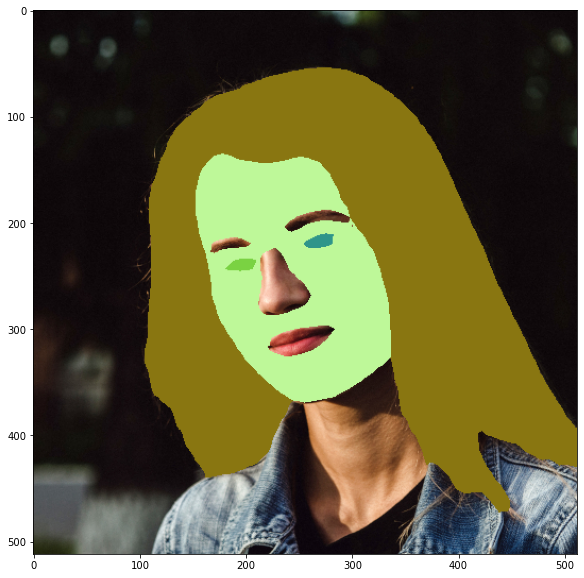

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(recolored)